In [1]:
import xarray as xr
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs 
import cartopy.feature as cfeat
from metpy.units import units
import metpy.calc as mpcalc
import cmocean as cmo
from numpy import zeros, newaxis
import shapefile as shp
import geopandas as gpd
import os
import pygrib
import cmocean
import glob
import netCDF4 as nc
import matplotlib.patches as mpatches
from matplotlib.ticker import FixedLocator, FixedFormatter

ERROR 1: PROJ: proj_create_from_database: Open of /home/eflicker/.conda/envs/OrionEnv/share/proj failed


In [2]:
obsst=np.load("Observed_Monthly_SST_ElNino_3.4_9_1983_6_2023.npy")

In [3]:
f10="/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20100501/gfs.t00z.flux.1p00.f????"
files10=glob.glob(f10)
files2010=sorted(files10)

f11="/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20110501/gfs.t00z.flux.1p00.f????"
files11=glob.glob(f11)
files2011=sorted(files11)

f12="/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20120501/gfs.t00z.flux.1p00.f????"
files12=glob.glob(f12)
files2012=sorted(files12)

f13="/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20130501/gfs.t00z.flux.1p00.f????"
files13=glob.glob(f13)
files2013=sorted(files13)

f14="/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20140501/gfs.t00z.flux.1p00.f????"
files14=glob.glob(f14)
files2014=sorted(files14)

f15="/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20150501/gfs.t00z.flux.1p00.f????"
files15=glob.glob(f15)
files2015=sorted(files15)

f16="/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20160501/gfs.t00z.flux.1p00.f????"
files16=glob.glob(f16)
files2016=sorted(files16)

f17="/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20170501/gfs.t00z.flux.1p00.f????"
files17=glob.glob(f17)
files2017=sorted(files17)

f18="/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20180501/gfs.t00z.flux.1p00.f????"
files18=glob.glob(f18)
files2018=sorted(files18)

f19="/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20190501/gfs.t00z.flux.1p00.f????"
files19=glob.glob(f19)
files2019=sorted(files19)

f23="/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/2023/gfs.t00z.flux.1p00.f????"
files23=glob.glob(f23)
files2023=sorted(files23)

directories=['/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20100501/gfs.t00z.flux.1p00.f????',
             '/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20110501/gfs.t00z.flux.1p00.f????',
             '/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20120501/gfs.t00z.flux.1p00.f????',
             '/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20130501/gfs.t00z.flux.1p00.f????',
             '/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20140501/gfs.t00z.flux.1p00.f????',
             '/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20150501/gfs.t00z.flux.1p00.f????',
             '/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20160501/gfs.t00z.flux.1p00.f????',
             '/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20170501/gfs.t00z.flux.1p00.f????',
             '/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20180501/gfs.t00z.flux.1p00.f????',
             '/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20190501/gfs.t00z.flux.1p00.f????',
             '/home/eflicker/work2/noaagsd-fv3-dev/eflicker/2023/gfs.t00z.flux.1p00.f????']

filedirs=[files2010,files2011,files2012,files2013,files2014,files2015,files2016,files2017,files2018,files2019,files2023]
direct=[files2010,files2011,files2012,files2013,files2014,files2015,files2016,files2017,files2018,files2019, files2023]

In [ ]:
# Loop to Create the Average Monthly Temperature in Colorado (Model Output)

test=np.zeros(30)
final=np.zeros(120)
n1=0
n2=0
a=0

for j in range(0,10):
    n1=1
    n2=1
    for k in range(0,12):
        n1=n2
        z=0
        if k==2 or k==3 or k==5 or k==7 or k==8 or k==10:
            n2=n2+31
            test=np.zeros(31)
        elif k==0 or k==1 or k==4 or k==6 or k==11:
            n2=n2+30
            test=np.zeros(30)
        else:
            n2=n2+28
            test=np.zeros(28)

        for i in range(n1,n2):

            if j==0:
                oep=xr.open_dataset(files2010[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'min','typeOfLevel':'heightAboveGround'}})
                oep2=xr.open_dataset(files2010[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'max','typeOfLevel':'heightAboveGround'}})

            elif j==1:
                oep=xr.open_dataset(files2011[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'min','typeOfLevel':'heightAboveGround'}})
                oep2=xr.open_dataset(files2011[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'max','typeOfLevel':'heightAboveGround'}})
            elif j==2:
                oep=xr.open_dataset(files2012[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'min','typeOfLevel':'heightAboveGround'}})
                oep2=xr.open_dataset(files2012[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'max','typeOfLevel':'heightAboveGround'}})
            elif j==3:
                oep=xr.open_dataset(files2013[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'min','typeOfLevel':'heightAboveGround'}})
                oep2=xr.open_dataset(files2013[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'max','typeOfLevel':'heightAboveGround'}})
            elif j==4:
                oep=xr.open_dataset(files2014[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'min','typeOfLevel':'heightAboveGround'}})
                oep2=xr.open_dataset(files2014[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'max','typeOfLevel':'heightAboveGround'}})
            elif j==5:
                oep=xr.open_dataset(files2015[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'min','typeOfLevel':'heightAboveGround'}})
                oep2=xr.open_dataset(files2015[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'max','typeOfLevel':'heightAboveGround'}})
            elif j==6:
                oep=xr.open_dataset(files2016[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'min','typeOfLevel':'heightAboveGround'}})
                oep2=xr.open_dataset(files2016[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'max','typeOfLevel':'heightAboveGround'}})
            elif j==7:
                oep=xr.open_dataset(files2017[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'min','typeOfLevel':'heightAboveGround'}})
                oep2=xr.open_dataset(files2017[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'max','typeOfLevel':'heightAboveGround'}})
            elif j==8:
                oep=xr.open_dataset(files2018[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'min','typeOfLevel':'heightAboveGround'}})
                oep2=xr.open_dataset(files2018[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'max','typeOfLevel':'heightAboveGround'}})
            else:
                oep=xr.open_dataset(files2019[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'min','typeOfLevel':'heightAboveGround'}})
                oep2=xr.open_dataset(files2019[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'max','typeOfLevel':'heightAboveGround'}})
            tempmin=oep['tmin']
            tempmax=oep2['tmax']
            tempmin2=tempmin[49:54, 251:259]
            tempmax2=tempmax[49:54, 251:259]
            tempminave=tempmin2.mean(axis=None)
            tempmaxave=tempmax2.mean(axis=None)
            tempminarr=np.asarray(tempminave)
            tempmaxarr=np.asarray(tempmaxave)
            tempavera=(tempminarr+tempmaxarr)/2
            tempaver=tempavera-273.15

            test[z]=tempaver
            z=z+1
            #print(test)

        
        print(n2)
        print(a)
        meantest=test.mean(axis=None)
        final[a]=meantest
        a=a+1
    print(final)

In [70]:
# Loop to Create 2023-2024 Monthly Average Temperature in Colorado (Model)
test=np.zeros(30)
final=np.zeros(12)
n1=1
n2=1
a=0

for k in range(0,12):
    n1=n2
    z=0
    if k==2 or k==3 or k==5 or k==7 or k==8 or k==10:
        n2=n2+31
        test=np.zeros(31)
    elif k==0 or k==1 or k==4 or k==6 or k==11:
        n2=n2+30
        test=np.zeros(30)
    else:
        n2=n2+28
        test=np.zeros(28)

    for i in range(n1,n2):


        oep=xr.open_dataset(files2023[i],engine='cfgrib',
                                backend_kwargs={'filter_by_keys':{'stepType':'min','typeOfLevel':'heightAboveGround'}})
        oep2=xr.open_dataset(files2023[i],engine='cfgrib',
                                backend_kwargs={'filter_by_keys':{'stepType':'max','typeOfLevel':'heightAboveGround'}})
        tempmin=oep['tmin']
        tempmax=oep2['tmax']
        tempmin2=tempmin[49:54, 251:259]
        tempmax2=tempmax[49:54, 251:259]
        tempminave=tempmin2.mean(axis=None)
        tempmaxave=tempmax2.mean(axis=None)
        tempminarr=np.asarray(tempminave)
        tempmaxarr=np.asarray(tempmaxave)
        tempavera=(tempminarr+tempmaxarr)/2
        tempaver=tempavera-273.15

        test[z]=tempaver
        z=z+1
        #print(test)


    print(n2)
    print(a)
    meantest=test.mean(axis=None)
    final[a]=meantest
    a=a+1
print(final)

31
0
61
1
92
2
123
3
153
4
184
5
214
6
245
7
276
8
304
9
335
10
365
11
[14.69136963 20.54911194 21.39969738 22.4013158  19.79155782 13.80282475
  3.91164856 -7.45463532 -8.79061319 -4.08917956  0.71646886  7.17875264]


In [71]:
np.save("Colorado_2023_Monthly_Avg_Model_Temps", final)

In [20]:
np.save("Colorado_Monthly_Avg_Model_Temps", final)

In [4]:
co_model=np.load("Colorado_Monthly_Avg_Model_Temps.npy")
co23_model=np.load("Colorado_2023_Monthly_Avg_Model_Temps.npy")

In [5]:
modsst=np.load("ModelAverage_MonthlyTemp_El_Nino_3.4.npy")

In [6]:
# Change to Fahrenheit
co_modelf=co_model*1.8+32
co23_modelf=co23_model*1.8+32

In [7]:
# 1990-2020 Statewide Climate Normals (Fahrenheit)
cojanavg=26.3
cofebavg=29
comaravg=37
coapravg=43.6
comayavg=53
cojunavg=63
cojulavg=68.6
coaugavg=66.4
cosepavg=58.9
cooctavg=46.9
conovavg=35.2
codecavg=26.4
normals=[cojanavg,cofebavg,comaravg,coapravg,comayavg,cojunavg,cojulavg,coaugavg,cosepavg,cooctavg,conovavg,codecavg]

In [8]:
# Put the Climate Normals in an Array 
avgs=np.zeros((132))
x=0
y=0
for i in range(0,11):
    for j in range(0,12):
        avgs[y]=normals[x]
        x=x+1
        y=y+1
    
    x=0
    

In [9]:
# Observed Monthly Temperatures in Colorado (Jan 2010 - Dec 2020)
obstemps=np.array([26.1,24.6,35.2,43.6,50.1,64,68.6,66.5,61.2,49.2,33.6,31.1,
                  24,24.2,37.7,43,49.3,62.9,70,69.2,58.5,47.1,34.9,24.4,
                  29.4,27.4,41.9,48.2,55.4,67.9,70.6,67.7,59.5,46.5,39.4,25.9,
                  22.9,25.7,35,39.8,52.8,65.6,68.5,67,60.7,44.2,35.2,23.7,
                  26.4,27.6,36.3,43.3,52.4,62.5,68.4,64.6,60,49.9,33.4,27.9,
                  29.2,32.1,40.6,44.8,49.8,64.9,66.6,66.9,62.6,51.4,34.6,25.8,
                  25.6,32.4,37.9,43.7,50.8,66.4,69.2,64.5,59.7,51.8,40.2,25.2,
                  25.3,35.4,42.5,44.3,51.5,64.8,69.4,64.7,59.1,46.7,41.3,30.1,
                  29.7,28.6,37.8,44,57.2,66.5,70,66.2,61.9,45,32.5,26.6,
                  26,24.9,33.8,45.5,47.9,60.6,69.1,68.3,62.9,40.9,35.2,28.1,
                  27.4,26.4,38.8,43.4,5536,65,69.3,70.1,58.8,47.1,38.5,26.7])

/tmp/ipykernel_303919/3969894030.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ax_formatter)


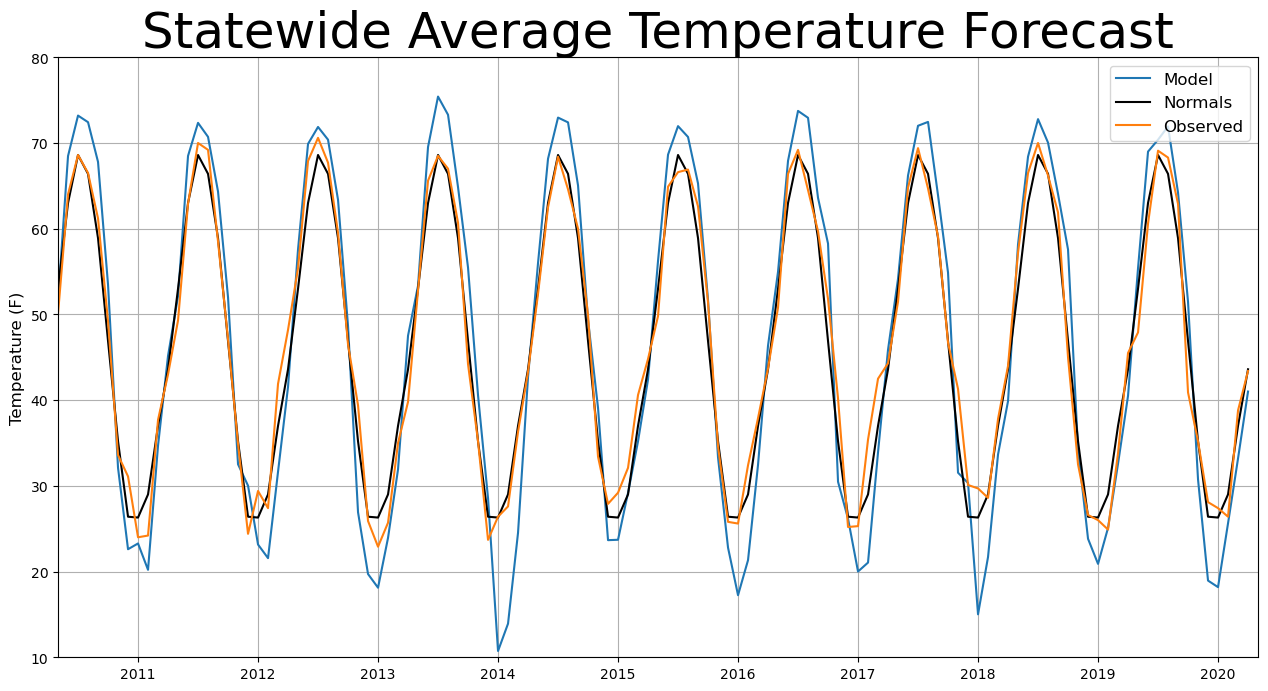

In [56]:
# Monthly Forecast Temperature in Colorado 

fig=plt.figure(figsize=(12,6))
ax=fig.add_axes([0,0,1,1])
line1=ax.plot((co_modelf), label="Model")
line2=ax.plot(avgs[4:],'black',label='Normals')
line3=ax.plot(obstemps[4:124], label='Observed')
ax.grid()
ax.set_title("Statewide Average Temperature Forecast", fontsize=36)
ax.set_xlim(0,120)
ax.set_ylim(10,80)
ax.legend(loc='upper right', fontsize=12)
ax.set_ylabel("Temperature (F)", fontsize=12)
ax_formatter= FixedFormatter(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
ax_locator=FixedLocator([8,20,32,44,56,68,80,92,104,116])
ax.xaxis.set_major_formatter(ax_formatter)
ax.xaxis.set_major_locator(ax_locator)
#plt.savefig("ElNino3.4_Daily_Mean_SST.jpg", format='jpg', dpi=100, bbox_inches='tight')

/tmp/ipykernel_303919/2379626971.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ax_formatter)


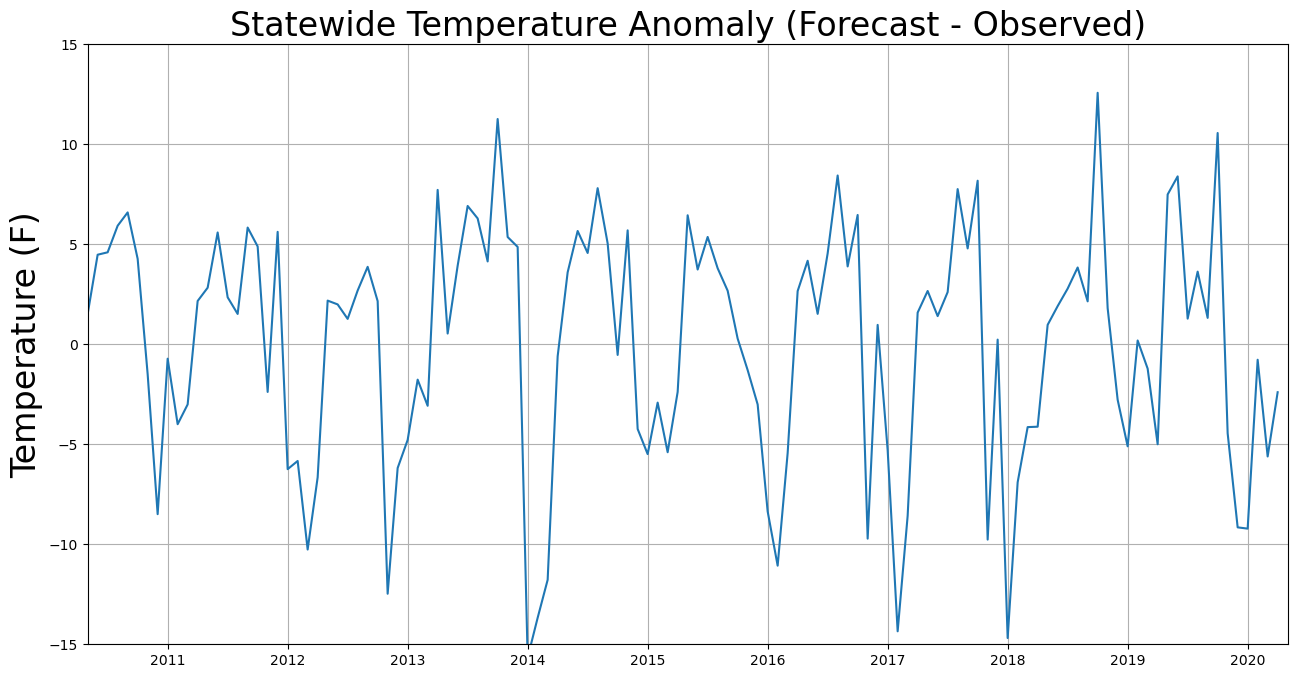

In [58]:
# Colorado Temperature Anomaly 

fig=plt.figure(figsize=(12,6))
ax=fig.add_axes([0,0,1,1])
line1=ax.plot((co_modelf-obstemps[4:124]))
ax.grid()
ax.set_title("Statewide Temperature Anomaly (Forecast - Observed)", fontsize=24)
ax.set_xlim(0,120)
ax.set_ylim(-15,15)
ax.set_ylabel("Temperature (F)", fontsize=24)
ax_formatter= FixedFormatter(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
ax_locator=FixedLocator([8,20,32,44,56,68,80,92,104,116])
ax.xaxis.set_major_formatter(ax_formatter)
ax.xaxis.set_major_locator(ax_locator)
#plt.savefig("ElNino3.4_Daily_Mean_SST.jpg", format='jpg', dpi=100, bbox_inches='tight')

In [11]:
# Model - Observed (Anomalies)
may_anom=((co_modelf[0]-obstemps[4])+(co_modelf[12]-obstemps[16])+(co_modelf[24]-obstemps[28])+(co_modelf[36]-obstemps[40])+
           (co_modelf[48]-obstemps[52])+(co_modelf[60]-obstemps[64])+(co_modelf[72]-obstemps[76])+(co_modelf[84]-obstemps[88])+
           (co_modelf[96]-obstemps[100])+(co_modelf[108]-obstemps[112]))/10
june_anom=((co_modelf[1]-obstemps[5])+(co_modelf[13]-obstemps[17])+(co_modelf[25]-obstemps[29])+(co_modelf[37]-obstemps[41])+
           (co_modelf[49]-obstemps[53])+(co_modelf[61]-obstemps[65])+(co_modelf[73]-obstemps[77])+(co_modelf[85]-obstemps[89])+
           (co_modelf[97]-obstemps[101])+(co_modelf[109]-obstemps[113]))/10
july_anom=((co_modelf[2]-obstemps[6])+(co_modelf[14]-obstemps[18])+(co_modelf[26]-obstemps[30])+(co_modelf[38]-obstemps[42])+
           (co_modelf[50]-obstemps[54])+(co_modelf[62]-obstemps[66])+(co_modelf[74]-obstemps[78])+(co_modelf[86]-obstemps[90])+
           (co_modelf[98]-obstemps[102])+(co_modelf[110]-obstemps[114]))/10
aug_anom=((co_modelf[3]-obstemps[7])+(co_modelf[15]-obstemps[19])+(co_modelf[27]-obstemps[31])+(co_modelf[39]-obstemps[43])+
           (co_modelf[51]-obstemps[55])+(co_modelf[63]-obstemps[67])+(co_modelf[75]-obstemps[79])+(co_modelf[87]-obstemps[91])+
           (co_modelf[99]-obstemps[103])+(co_modelf[111]-obstemps[115]))/10
sep_anom=((co_modelf[4]-obstemps[8])+(co_modelf[16]-obstemps[20])+(co_modelf[28]-obstemps[32])+(co_modelf[40]-obstemps[44])+
           (co_modelf[52]-obstemps[56])+(co_modelf[64]-obstemps[68])+(co_modelf[76]-obstemps[80])+(co_modelf[88]-obstemps[92])+
           (co_modelf[100]-obstemps[104])+(co_modelf[112]-obstemps[116]))/10
oct_anom=((co_modelf[5]-obstemps[9])+(co_modelf[17]-obstemps[21])+(co_modelf[29]-obstemps[33])+(co_modelf[41]-obstemps[45])+
           (co_modelf[53]-obstemps[57])+(co_modelf[65]-obstemps[69])+(co_modelf[77]-obstemps[81])+(co_modelf[89]-obstemps[93])+
           (co_modelf[101]-obstemps[105])+(co_modelf[113]-obstemps[117]))/10
nov_anom=((co_modelf[6]-obstemps[10])+(co_modelf[18]-obstemps[22])+(co_modelf[30]-obstemps[34])+(co_modelf[42]-obstemps[46])+
           (co_modelf[54]-obstemps[58])+(co_modelf[66]-obstemps[70])+(co_modelf[78]-obstemps[82])+(co_modelf[90]-obstemps[94])+
           (co_modelf[102]-obstemps[106])+(co_modelf[114]-obstemps[118]))/10
dec_anom=((co_modelf[7]-obstemps[11])+(co_modelf[19]-obstemps[23])+(co_modelf[31]-obstemps[35])+(co_modelf[43]-obstemps[47])+
           (co_modelf[55]-obstemps[59])+(co_modelf[67]-obstemps[71])+(co_modelf[79]-obstemps[83])+(co_modelf[91]-obstemps[95])+
           (co_modelf[103]-obstemps[107])+(co_modelf[115]-obstemps[119]))/10
jan_anom=((co_modelf[8]-obstemps[12])+(co_modelf[20]-obstemps[24])+(co_modelf[32]-obstemps[36])+(co_modelf[44]-obstemps[48])+
           (co_modelf[56]-obstemps[60])+(co_modelf[68]-obstemps[72])+(co_modelf[80]-obstemps[84])+(co_modelf[92]-obstemps[96])+
           (co_modelf[104]-obstemps[108])+(co_modelf[116]-obstemps[120]))/10
feb_anom=((co_modelf[9]-obstemps[13])+(co_modelf[21]-obstemps[25])+(co_modelf[33]-obstemps[37])+(co_modelf[45]-obstemps[49])+
           (co_modelf[57]-obstemps[61])+(co_modelf[69]-obstemps[73])+(co_modelf[81]-obstemps[85])+(co_modelf[93]-obstemps[97])+
           (co_modelf[105]-obstemps[109])+(co_modelf[117]-obstemps[121]))/10
mar_anom=((co_modelf[10]-obstemps[14])+(co_modelf[22]-obstemps[26])+(co_modelf[34]-obstemps[38])+(co_modelf[46]-obstemps[50])+
           (co_modelf[58]-obstemps[62])+(co_modelf[70]-obstemps[74])+(co_modelf[82]-obstemps[86])+(co_modelf[94]-obstemps[98])+
           (co_modelf[106]-obstemps[110])+(co_modelf[118]-obstemps[122]))/10
apr_anom=((co_modelf[11]-obstemps[15])+(co_modelf[23]-obstemps[27])+(co_modelf[35]-obstemps[39])+(co_modelf[47]-obstemps[51])+
           (co_modelf[59]-obstemps[63])+(co_modelf[71]-obstemps[75])+(co_modelf[83]-obstemps[87])+(co_modelf[95]-obstemps[99])+
           (co_modelf[107]-obstemps[111])+(co_modelf[119]-obstemps[123]))/10


In [12]:
model_anomalies=[may_anom,june_anom,july_anom,aug_anom,sep_anom,oct_anom,nov_anom,dec_anom,jan_anom,feb_anom,mar_anom,apr_anom]

In [16]:
bias_temp_anoms=anom23-model_anomalies

/tmp/ipykernel_303919/3016052177.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ax_formatter)


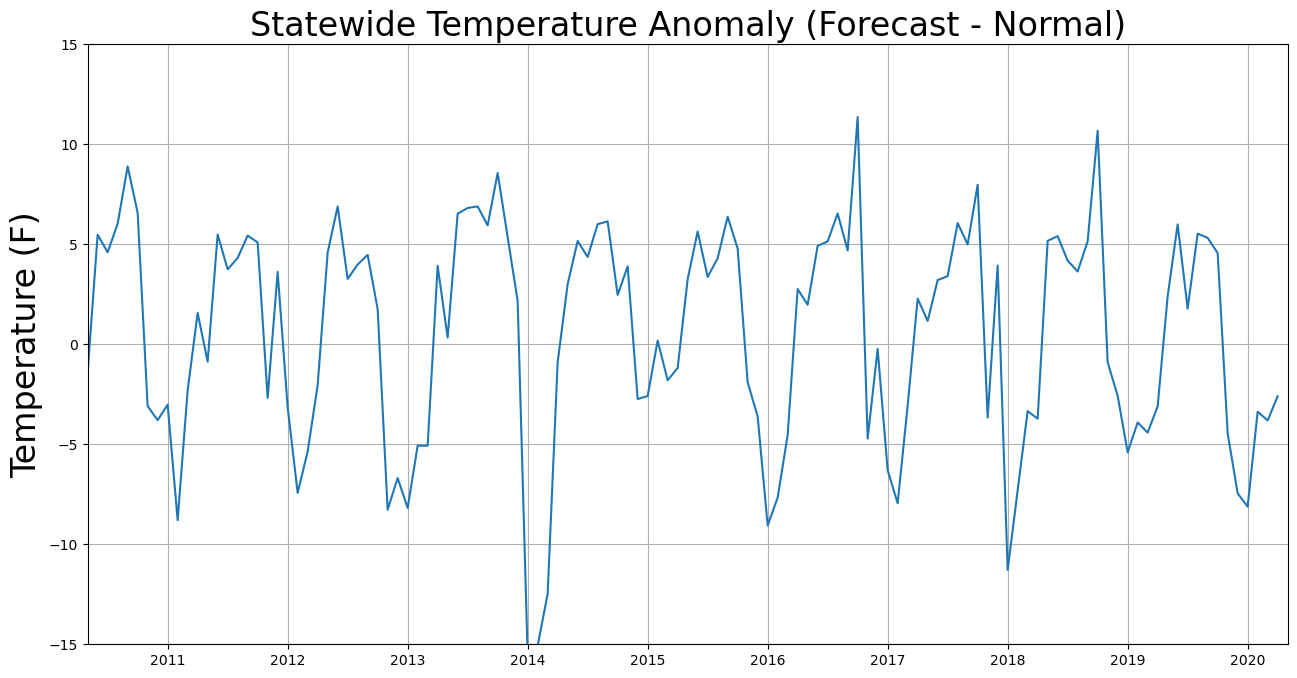

In [60]:
# Colorado Temperature Anomaly 

fig=plt.figure(figsize=(12,6))
ax=fig.add_axes([0,0,1,1])
line1=ax.plot((co_modelf-avgs[4:124]))
ax.grid()
ax.set_title("Statewide Temperature Anomaly (Forecast - Normal)", fontsize=24)
ax.set_xlim(0,120)
ax.set_ylim(-15,15)
ax.set_ylabel("Temperature (F)", fontsize=24)
ax_formatter= FixedFormatter(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
ax_locator=FixedLocator([8,20,32,44,56,68,80,92,104,116])
ax.xaxis.set_major_formatter(ax_formatter)
ax.xaxis.set_major_locator(ax_locator)
#plt.savefig("ElNino3.4_Daily_Mean_SST.jpg", format='jpg', dpi=100, bbox_inches='tight')

/tmp/ipykernel_303919/1164315385.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ax_formatter)


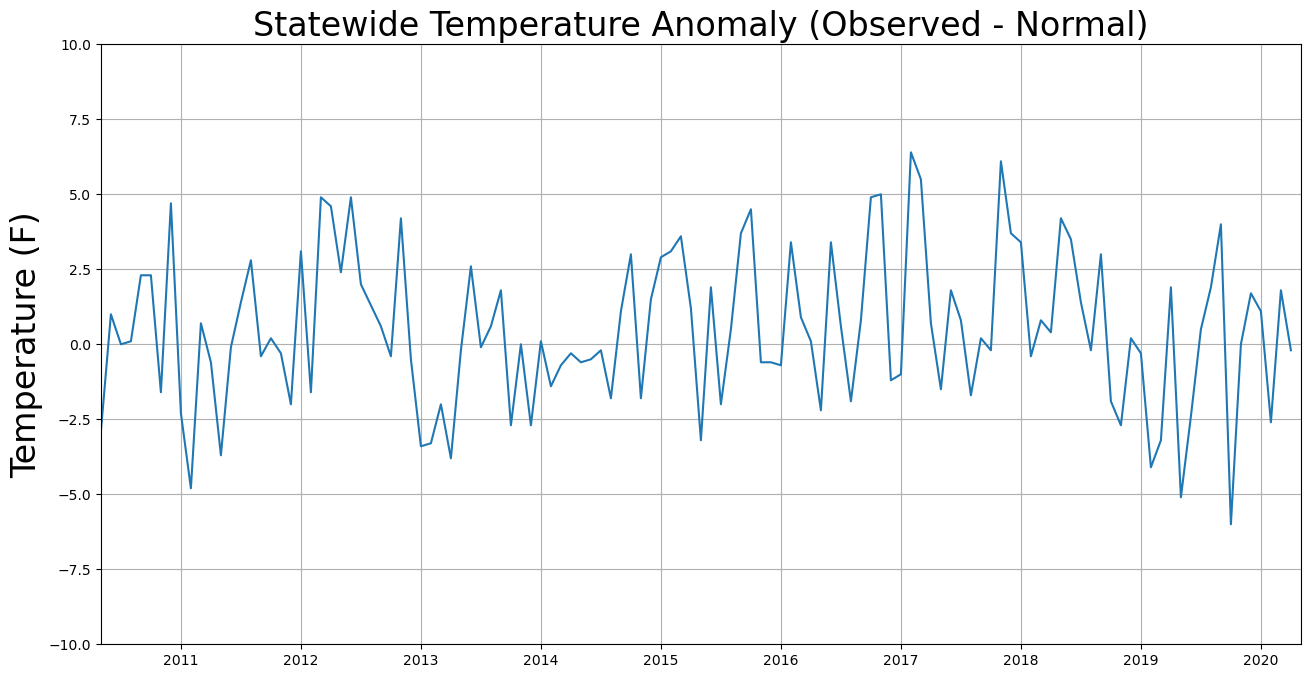

In [62]:
# Colorado Temperature Anomaly 

fig=plt.figure(figsize=(12,6))
ax=fig.add_axes([0,0,1,1])
line1=ax.plot((obstemps[4:124]-avgs[4:124]))
ax.grid()
ax.set_title("Statewide Temperature Anomaly (Observed - Normal)", fontsize=24)
ax.set_xlim(0,120)
ax.set_ylim(-10,10)
ax.set_ylabel("Temperature (F)", fontsize=24)
ax_formatter= FixedFormatter(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
ax_locator=FixedLocator([8,20,32,44,56,68,80,92,104,116])
ax.xaxis.set_major_formatter(ax_formatter)
ax.xaxis.set_major_locator(ax_locator)
#plt.savefig("ElNino3.4_Daily_Mean_SST.jpg", format='jpg', dpi=100, bbox_inches='tight')

/tmp/ipykernel_180591/816903936.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ax_formatter)


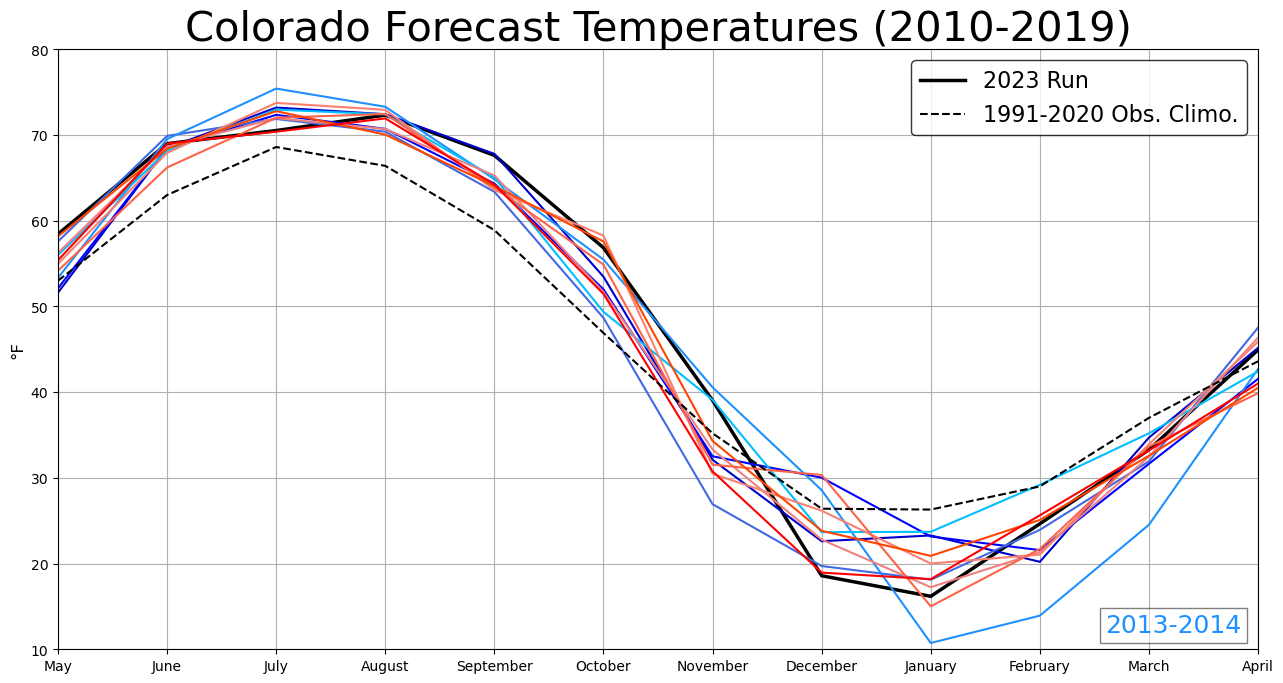

In [44]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_axes([0,0,1,1])
line1=ax.plot(co23_modelf, 'black',label="2023 Run", linewidth=2.5)
line2=ax.plot(co_modelf[0:12], 'mediumblue')
line2=ax.plot(co_modelf[12:24], 'blue')
line2=ax.plot(co_modelf[24:36], 'royalblue')
line2=ax.plot(co_modelf[36:48], 'dodgerblue')
line2=ax.plot(co_modelf[48:60], 'deepskyblue')
line2=ax.plot(co_modelf[60:72], 'lightcoral')
line2=ax.plot(co_modelf[72:84], 'salmon')
line2=ax.plot(co_modelf[84:96], 'tomato')
line2=ax.plot(co_modelf[96:108], 'orangered')
line2=ax.plot(co_modelf[108:120], 'red')
line20=ax.plot(avgs[4:16], 'black', linestyle='dashed', label='1991-2020 Obs. Climo.')

plt.text(9.6,12, '2013-2014', fontsize = 18,color='dodgerblue',
         bbox = dict(facecolor = 'white', alpha = 0.5))
ax.grid()
ax.set_title("Colorado Forecast Temperatures (2010-2019)", fontsize=30)
ax.set_xlim(0,11)
ax.set_ylim(10,80)
ax.legend(loc='upper right', fontsize=16, edgecolor='black')
ax.set_ylabel("°F", fontsize=12)
ax_formatter= FixedFormatter(['May','June','July','August','September','October','November','December','January','February','March','April'])
ax_locator=FixedLocator([0,1,2,3,4,5,6,7,8,9,10,11])
ax.xaxis.set_major_formatter(ax_formatter)
ax.xaxis.set_major_locator(ax_locator)


plt.savefig("Colorado_Forecast_Temps.jpg", format='jpg', dpi=100, bbox_inches='tight')

/tmp/ipykernel_125086/205230312.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ax_formatter)


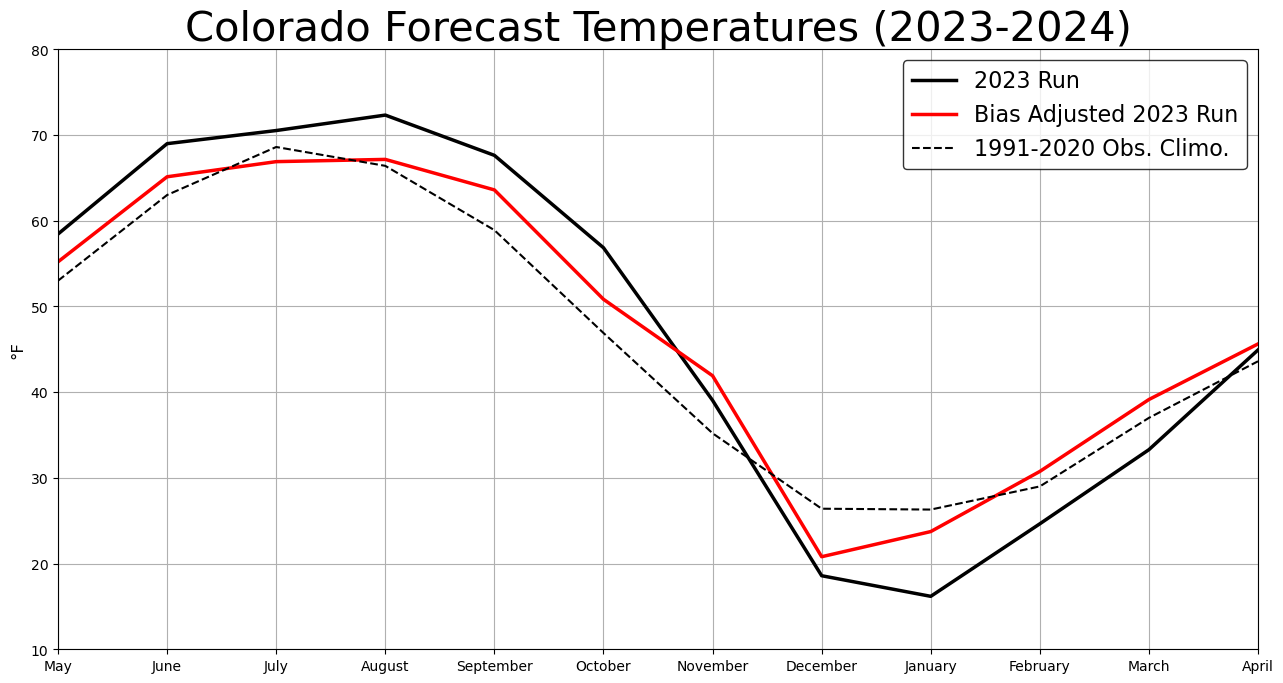

In [15]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_axes([0,0,1,1])
line1=ax.plot(co23_modelf, 'black',label="2023 Run", linewidth=2.5)
line2=ax.plot(co23_modelf-model_anomalies,label='Bias Adjusted 2023 Run', linewidth=2.5, color='red')
line20=ax.plot(avgs[4:16], 'black', linestyle='dashed', label='1991-2020 Obs. Climo.')
ax.grid()
ax.set_title("Colorado Forecast Temperatures (2023-2024)", fontsize=30)
ax.set_xlim(0,11)
ax.set_ylim(10,80)
ax.legend(loc='upper right', fontsize=16, edgecolor='black')
ax.set_ylabel("°F", fontsize=12)
ax_formatter= FixedFormatter(['May','June','July','August','September','October','November','December','January','February','March','April'])
ax_locator=FixedLocator([0,1,2,3,4,5,6,7,8,9,10,11])
ax.xaxis.set_major_formatter(ax_formatter)
ax.xaxis.set_major_locator(ax_locator)


plt.savefig("Colorado_Forecast_Temps.jpg", format='jpg', dpi=100, bbox_inches='tight')

/tmp/ipykernel_30073/1154930588.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ax_formatter)


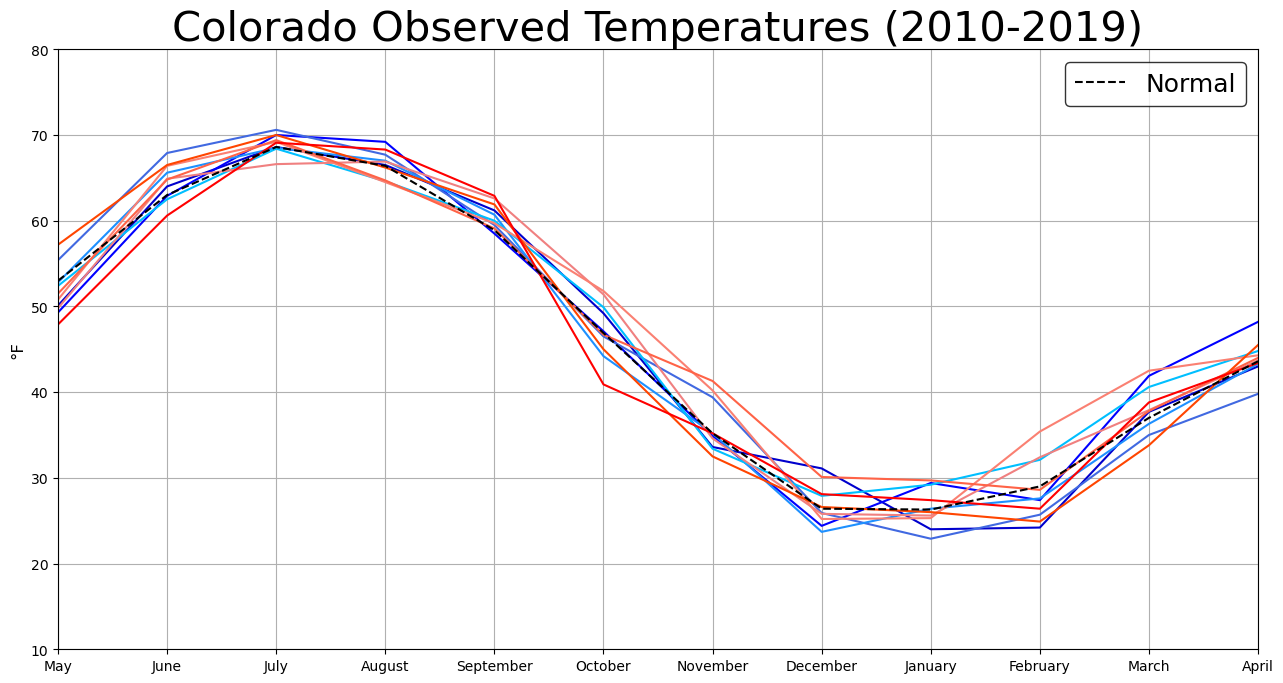

In [49]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_axes([0,0,1,1])
line2=ax.plot(obstemps[4:16], 'mediumblue')
line2=ax.plot(obstemps[16:28], 'blue')
line2=ax.plot(obstemps[28:40], 'royalblue')
line2=ax.plot(obstemps[40:52], 'dodgerblue')
line2=ax.plot(obstemps[52:64], 'deepskyblue')
line2=ax.plot(obstemps[64:76], 'lightcoral')
line2=ax.plot(obstemps[76:88], 'salmon')
line2=ax.plot(obstemps[88:100], 'tomato')
line2=ax.plot(obstemps[100:112], 'orangered')
line2=ax.plot(obstemps[112:124], 'red')
line20=ax.plot(avgs[4:16], 'black', linestyle='dashed', label='Normal')
ax.grid()
ax.set_title("Colorado Observed Temperatures (2010-2019)", fontsize=30)
ax.set_xlim(0,11)
ax.set_ylim(10,80)
ax.legend(loc='upper right', fontsize=18, edgecolor='black')
ax.set_ylabel("°F", fontsize=12)
ax_formatter= FixedFormatter(['May','June','July','August','September','October','November','December','January','February','March','April'])
ax_locator=FixedLocator([0,1,2,3,4,5,6,7,8,9,10,11])
ax.xaxis.set_major_formatter(ax_formatter)
ax.xaxis.set_major_locator(ax_locator)


plt.savefig("Colorado_Observed_Temperatures.jpg", format='jpg', dpi=100, bbox_inches='tight')

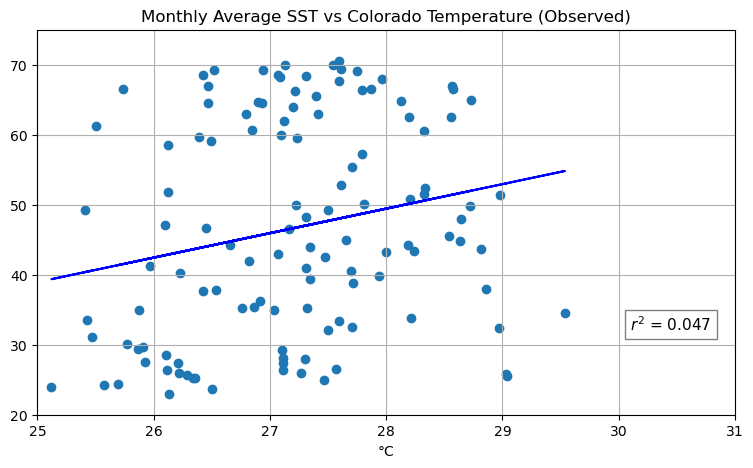

In [86]:
y=obstemps[4:124]
x=obsst[344:464]
plt.figure(figsize=(9,5))
plt.scatter(x, y)

#Calculating R Squared and Rounding to 3 digits
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2

R_sq
rq=round(R_sq,3)
rq

plt.text(30.1, 32, '$r^2$ = ' +str(rq), fontsize = 11, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.xlabel('°C')
plt.grid()
plt.ylim(20,75)
plt.xlim(25,31)
plt.xlabel('°C')
plt.title('Monthly Average SST vs Colorado Temperature (Observed)')
z = np.polyfit(x, y, 1)

p = np.poly1d(z)

plt.plot(x, p(x), 'b')
#plt.savefig('Obs_Scatter_TCC_vs_SST.png', format='png')

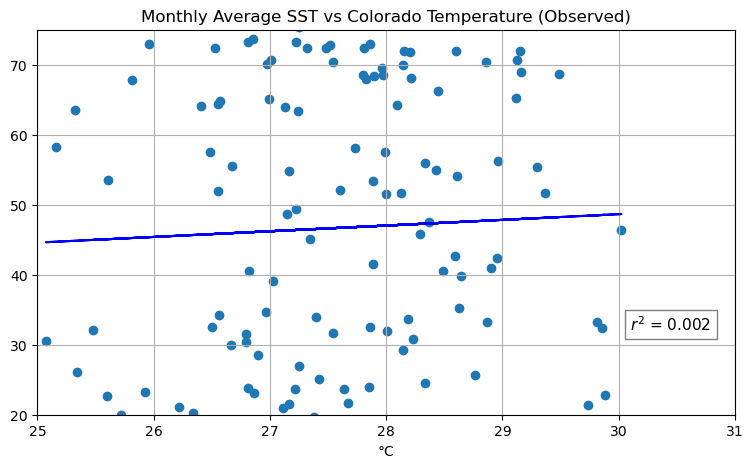

In [28]:
y=co_modelf
x=modsst
plt.figure(figsize=(9,5))
plt.scatter(x, y)

#Calculating R Squared and Rounding to 3 digits
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2

R_sq
rq=round(R_sq,3)
rq

plt.text(30.1, 32, '$r^2$ = ' +str(rq), fontsize = 11, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.xlabel('°C')
plt.grid()
plt.ylim(20,75)
plt.xlim(25,31)
plt.xlabel('°C')
plt.title('Monthly Average SST vs Colorado Temperature (Observed)')
z = np.polyfit(x, y, 1)

p = np.poly1d(z)

plt.plot(x, p(x), 'b')
#plt.savefig('Obs_Scatter_TCC_vs_SST.png', format='png')

In [17]:
winterobs=np.array([26.1,24.6,31.1,24,24.2,24.4,29.4,27.4,25.9,22.9,25.7,23.7,26.4,27.6,27.9,
                   29.2,32.1,25.8,25.6,32.4,25.2,25.3,35.4,30.1,29.7,28.6,26.6,26,24.9,28.1,27.4,26.4,26.7])
wintersst=np.array([28.1104,27.9349,25.4682,25.1202,25.5746,25.6898,25.862,26.2097,26.22,26.1283,26.2895,26.5025,
                   26.1111,25.9289,27.3032,27.1026,27.5029,29.03356,29.0401,28.9679,26.3572,26.3399,26.8666,25.77039,
                   25.9104,26.1037,27.5663,27.2656,27.4627,27.1159,27.1123,27.7167,25.6952])

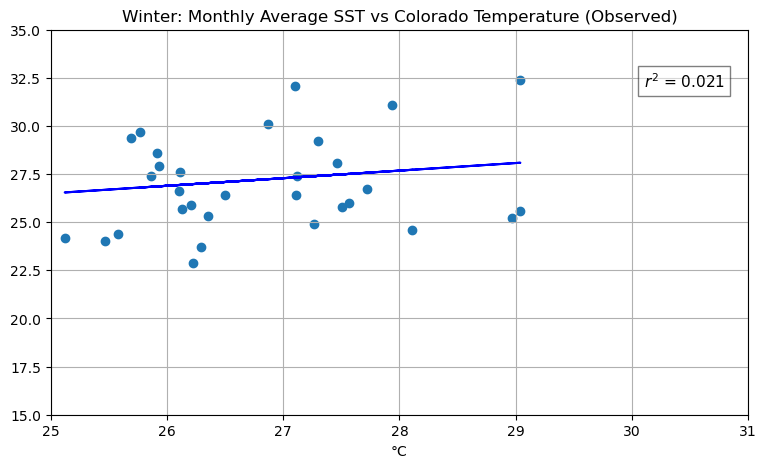

In [6]:
y=winterobs[1:33]
x=wintersst[0:32]
plt.figure(figsize=(9,5))
plt.scatter(x, y)

#Calculating R Squared and Rounding to 3 digits
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2

R_sq
rq=round(R_sq,3)
rq

plt.text(30.1, 32, '$r^2$ = ' +str(rq), fontsize = 11, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.xlabel('°C')
plt.grid()
plt.ylim(15,35)
plt.xlim(25,31)
plt.xlabel('°C')
plt.title('Winter: Monthly Average SST vs Colorado Temperature (Observed)')
z = np.polyfit(x, y, 1)

p = np.poly1d(z)

plt.plot(x, p(x), 'b')
#plt.savefig('Obs_Scatter_TCC_vs_SST.png', format='png')

In [11]:
# Precipitation Rate for 2023-24 over Colorado 

test=np.zeros(30)
final=np.zeros(12)
n1=1
n2=1
a=0

for k in range(0,12):
    n1=n2
    z=0
    if k==2 or k==3 or k==5 or k==7 or k==8 or k==10:
        n2=n2+31
        test=np.zeros(31)
    elif k==0 or k==1 or k==4 or k==6 or k==11:
        n2=n2+30
        test=np.zeros(30)
    else:
        n2=n2+28
        test=np.zeros(28)

    for i in range(n1,n2):


        oep=xr.open_dataset(files2023[i],engine='cfgrib',
                                backend_kwargs={'filter_by_keys':{'stepType':'avg','typeOfLevel':'surface'}})
        tempmin=oep['prate']
        tempmin2=tempmin[49:54, 251:259]
        tempminave=tempmin2.mean(axis=None)
        tempminarr=np.asarray(tempminave)
        tempaver=tempminarr*86400

        test[z]=tempaver
        z=z+1
        #print(test)


    print(n2)
    print(a)
    meantest=test.mean(axis=None)
    final[a]=meantest
    a=a+1
print(final)

31
0
61
1
92
2
123
3
153
4
184
5
214
6
245
7
276
8
304
9
335
10
365
11
[1.72319901 1.28832762 2.90860587 1.59288154 0.74758752 1.9643681
 2.0364278  1.65858454 1.40574475 0.88294629 0.78753322 2.24247746]


In [14]:
# Above Loop gives mm/day, so we want to multiply to get mm/month, and then convert to inches /month 
multiply=np.array([31,30,31,31,30,31,30,31,31,29,31,29])
monthly=final*multiply

monthly_inches=monthly*.03937

In [18]:
np.save("Colorado_2023_24_Forecast_Monthly_Precip", monthly_inches)

In [4]:
# Loop to Create the Average Monthly PRATE in Colorado (Model Output)

test=np.zeros(30)
final=np.zeros(120)
n1=0
n2=0
a=0

for j in range(0,10):
    n1=1
    n2=1
    for k in range(0,12):
        n1=n2
        z=0
        if k==2 or k==3 or k==5 or k==7 or k==8 or k==10:
            n2=n2+31
            test=np.zeros(31)
        elif k==0 or k==1 or k==4 or k==6 or k==11:
            n2=n2+30
            test=np.zeros(30)
        else:
            n2=n2+28
            test=np.zeros(28)

        for i in range(n1,n2):

            if j==0:
                oep=xr.open_dataset(files2010[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'avg','typeOfLevel':'surface'}})
        
            elif j==1:
                oep=xr.open_dataset(files2011[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'avg','typeOfLevel':'surface'}})
                
            elif j==2:
                oep=xr.open_dataset(files2012[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'avg','typeOfLevel':'surface'}})
               
            elif j==3:
                oep=xr.open_dataset(files2013[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'avg','typeOfLevel':'surface'}})
                
            elif j==4:
                oep=xr.open_dataset(files2014[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'avg','typeOfLevel':'surface'}})
                
            elif j==5:
                oep=xr.open_dataset(files2015[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'avg','typeOfLevel':'surface'}})
               
            elif j==6:
                oep=xr.open_dataset(files2016[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'avg','typeOfLevel':'surface'}})
               
            elif j==7:
                oep=xr.open_dataset(files2017[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'avg','typeOfLevel':'surface'}})
               
            elif j==8:
                oep=xr.open_dataset(files2018[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'avg','typeOfLevel':'surface'}})
               
            else:
                oep=xr.open_dataset(files2019[i],engine='cfgrib',
                                    backend_kwargs={'filter_by_keys':{'stepType':'avg','typeOfLevel':'surface'}})
                
            tempmin=oep['prate']
            tempmin2=tempmin[49:54, 251:259]
            tempminave=tempmin2.mean(axis=None)
            tempminarr=np.asarray(tempminave)
            tempaverage=tempminarr*86400
            
            if k==0 or k==2 or k==3 or k==5 or k==7 or k==8 or k==10:
                tempaver=tempaverage*31
            elif k==0 or k==1 or k==4 or k==6 or k==11:
                tempaver=tempaverage*30
            else:
                tempaver=tempaverage*28
                
            tempavers=tempaver*.03937

            test[z]=tempavers
            z=z+1
            #print(test)

        
        print(n2)
        print(a)
        meantest=test.mean(axis=None)
        final[a]=meantest
        a=a+1
    print(final)

31
0
61
1
92
2
123
3
153
4
184
5
214
6
245
7
276
8
304
9
335
10
365
11
[2.4637751  1.17119048 1.58041614 2.15080127 1.48785602 1.17960932
 3.18457856 1.00997656 1.19968544 2.08298761 1.90352771 2.14059654
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.   

Can't read index file '/home/eflicker/work2/noaa/gsd-fv3-dev/eflicker/sfs_data/o2/gfs.20190501/gfs.t00z.flux.1p00.f2568.923a8.idx'
Traceback (most recent call last):
  File "/home/eflicker/.conda/envs/OrionEnv/lib/python3.11/site-packages/cfgrib/messages.py", line 547, in from_indexpath_or_filestream
    self = cls.from_indexpath(indexpath)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/eflicker/.conda/envs/OrionEnv/lib/python3.11/site-packages/cfgrib/messages.py", line 429, in from_indexpath
    index = pickle.load(file)
            ^^^^^^^^^^^^^^^^^
EOFError: Ran out of input


123
111
153
112
184
113
214
114
245
115
276
116
304
117
335
118
365
119
[2.4637751  1.17119048 1.58041614 2.15080127 1.48785602 1.17960932
 3.18457856 1.00997656 1.19968544 2.08298761 1.90352771 2.14059654
 3.50124523 0.8319793  2.92865484 2.87584551 2.87451887 1.67556138
 1.00381291 1.08717855 0.82874782 1.72056066 1.81648489 3.63039149
 3.67457813 0.63349781 4.44800945 2.65789339 1.73469422 1.84861614
 1.09959425 2.0179768  1.37845482 2.28507472 0.85551474 1.30643687
 1.80691818 1.07335799 1.69644359 2.07957582 2.10055666 2.34996643
 2.13054829 1.00864316 1.37263133 0.88195515 2.12382343 1.1359502
 0.83188408 2.02436503 2.52287492 2.12486764 1.00266318 1.55132928
 1.68221824 1.59054595 0.66627195 1.42690339 1.98801239 3.55233234
 4.8065725  2.09822658 3.15494412 2.92684511 2.18993633 1.83653716
 2.38692113 1.53859386 1.01584765 1.45986455 2.14807315 2.09917231
 2.68193068 0.7209283  1.8997213  2.32040338 1.76827795 0.89374839
 1.91251122 1.82669644 1.75225312 1.36571257 2.62700367 1.

In [5]:
np.save('Colorado_Forecast_Monthly_Precip', final)

In [24]:
newfcst=np.load('Colorado_2023_24_Forecast_Monthly_Precip.npy')
oldfcst=np.load('Colorado_Forecast_Monthly_Precip.npy')

/tmp/ipykernel_36508/3877326035.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ax_formatter)


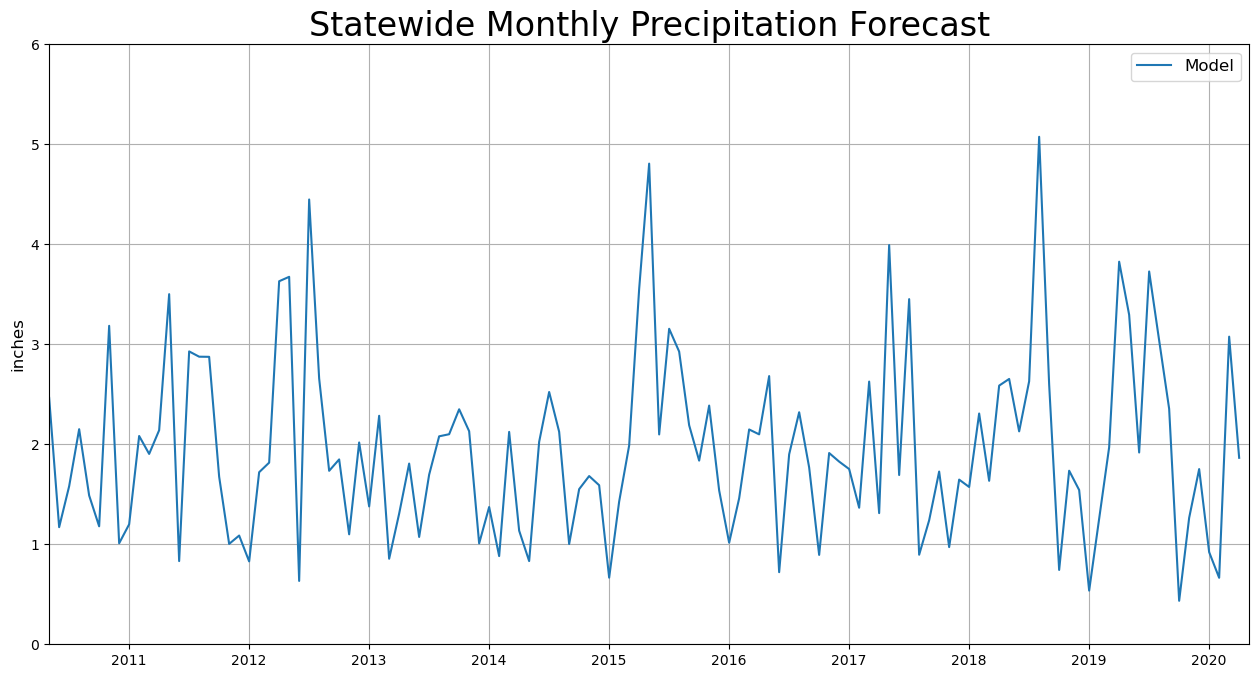

In [8]:
# Monthly Forecast Temperature in Colorado 

fig=plt.figure(figsize=(12,6))
ax=fig.add_axes([0,0,1,1])
line1=ax.plot((oldfcst), label="Model")
#line2=ax.plot(avgs[4:],'black',label='Normals')
#line3=ax.plot(obstemps[4:124], label='Observed')
ax.grid()
ax.set_title("Statewide Monthly Precipitation Forecast", fontsize=24)
ax.set_xlim(0,120)
ax.set_ylim(0,6)
ax.legend(loc='upper right', fontsize=12)
ax.set_ylabel("inches", fontsize=12)
ax_formatter= FixedFormatter(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
ax_locator=FixedLocator([8,20,32,44,56,68,80,92,104,116])
ax.xaxis.set_major_formatter(ax_formatter)
ax.xaxis.set_major_locator(ax_locator)
#plt.savefig("ElNino3.4_Daily_Mean_SST.jpg", format='jpg', dpi=100, bbox_inches='tight')

In [25]:
# Observed Precipitation over the state by month (Jan 2010 - Dec 2020)

obsprecip=np.array([0.88,1.21,1.74,2.13,1.34,1.35,2.46,2.34,0.73,1.44,0.95,1.65,.71,1.17,1.16,2.1,2.57,
                    .94,2.54,1.6,1.27,1.66,.99,.91,.69,1.36,.45,1.38,.91,.42,2.27,1.07,1.29,.72,.44,
                    1.31,.91,.89,1.07,1.67,1.55,.66,2.44,2.24,3.88,1.51,1.15,.82,1.18,1.18,1.15,1.35,2.15,
                   1.19,2.76,2.59,2.08,1.08,1.12,1.31,.65,1.35,.86,1.88,5.3,1.91,2.37,1.67,.76,1.82,1.69,1.47,
                   1.02,.85,1.28,2.74,2.87,1.35,1.64,2.07,1,.49,.92,1.65,2.29,1,1.19,2.17,2.02,.69,3.05,1.87,1.98,
                   .93,.52,.4,.81,1.13,.9,1.37,1.54,.98,2.11,1.45,.66,2.39,.87,.75,1.38,1.57,2.79,1.44,2.84,1.78,
                    1.58,1.47,.71,.97,1.11,1.27,.72,1.09,1.35,.8,1.07,1.15,1.85,.8,.97,.62,.85,.96])

In [26]:
# 1990-2020 Statewide Climate Normals (Precipitation)
pcojanavg=1.07
pcofebavg=1.09
pcomaravg=1.37
pcoapravg=1.82
pcomayavg=1.96
pcojunavg=1.45
pcojulavg=2.12
pcoaugavg=2.08
pcosepavg=1.49
pcooctavg=1.42
pconovavg=1.08
pcodecavg=1.06
precip_normals=[pcojanavg,pcofebavg,pcomaravg,pcoapravg,pcomayavg,pcojunavg,pcojulavg,pcoaugavg,pcosepavg,pcooctavg,pconovavg,pcodecavg]

In [27]:
# Put the Precipitation Normals into an array
p_avgs=np.zeros((132))
x=0
y=0
for i in range(0,11):
    for j in range(0,12):
        p_avgs[y]=precip_normals[x]
        x=x+1
        y=y+1
    
    x=0
    

/tmp/ipykernel_14704/327536993.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ax_formatter)


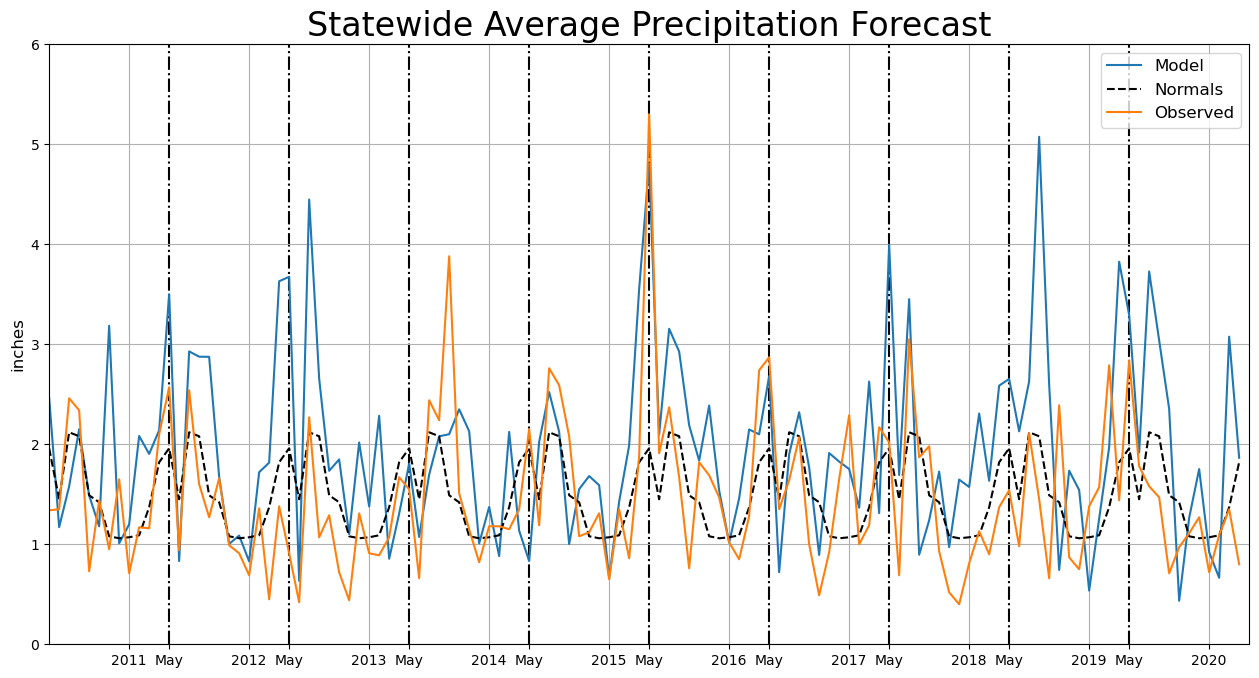

In [37]:
# Monthly Forecast Precipitation in Colorado 

fig=plt.figure(figsize=(12,6))
ax=fig.add_axes([0,0,1,1])
line1=ax.plot((oldfcst), label="Model")
line2=ax.plot(p_avgs[4:124],'black',label='Normals', linestyle='dashed')
line3=ax.plot(obsprecip[4:124], label='Observed')
ax.grid()
ax.set_title("Statewide Average Precipitation Forecast", fontsize=24)
ax.set_xlim(0,120)
ax.set_ylim(0,6)
ax.legend(loc='upper right', fontsize=12)
ax.set_ylabel("inches", fontsize=12)
ax_formatter= FixedFormatter(['2011','May', '2012', 'May','2013', 'May','2014', 'May','2015','May', '2016', 'May','2017', 'May','2018','May', '2019', 'May','2020'])
ax_locator=FixedLocator([8,12, 20,24, 32, 36,44,48, 56,60, 68,72, 80,84, 92,96, 104,108, 116])
ax.xaxis.set_major_formatter(ax_formatter)
ax.xaxis.set_major_locator(ax_locator)

arra=np.arange(1,19,2)
for i in arra:
    a = ax.get_xgridlines()
    b = a[i]
    b.set_color('black')
    b.set_linestyle('dashdot')
    b.set_linewidth(1.5)
#plt.savefig("ElNino3.4_Daily_Mean_SST.jpg", format='jpg', dpi=100, bbox_inches='tight')

/tmp/ipykernel_180591/3220526533.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ax_formatter)


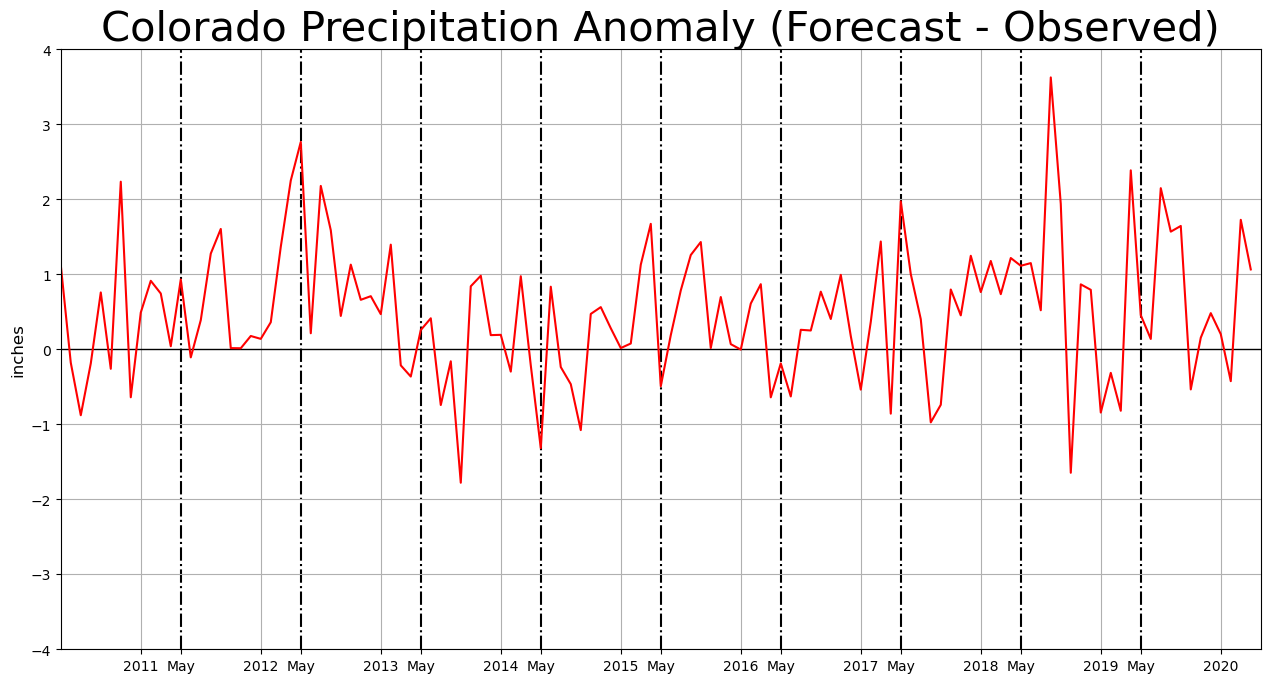

In [32]:
# Colorado Temperature Anomaly 

fig=plt.figure(figsize=(12,6))
ax=fig.add_axes([0,0,1,1])
line1=ax.plot((oldfcst-obsprecip[4:124]),'r')
ax.grid()
ax.set_title("Colorado Precipitation Anomaly (Forecast - Observed)", fontsize=30)
ax.set_xlim(0,120)
ax.set_ylim(-4,4)
ax.set_ylabel("inches", fontsize=12)
ax_formatter= FixedFormatter(['2011','May', '2012', 'May','2013', 'May','2014', 'May','2015','May', '2016', 'May','2017', 'May','2018','May', '2019', 'May','2020'])
ax_locator=FixedLocator([8,12, 20,24, 32, 36,44,48, 56,60, 68,72, 80,84, 92,96, 104,108, 116])
ax.xaxis.set_major_formatter(ax_formatter)
ax.xaxis.set_major_locator(ax_locator)

a=ax.get_ygridlines()
a2=a[4]
a2.set_color('black')
a2.set_linewidth(1)
a2.set_linestyle('solid')

arra=np.arange(1,19,2)
for i in arra:
    a = ax.get_xgridlines()
    b = a[i]
    b.set_color('black')
    b.set_linestyle('dashdot')
    b.set_linewidth(1.5)
plt.savefig("Colorado_Precip_Anomaly.jpg", format='jpg', dpi=100, bbox_inches='tight')

/tmp/ipykernel_30073/2654464337.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ax_formatter)


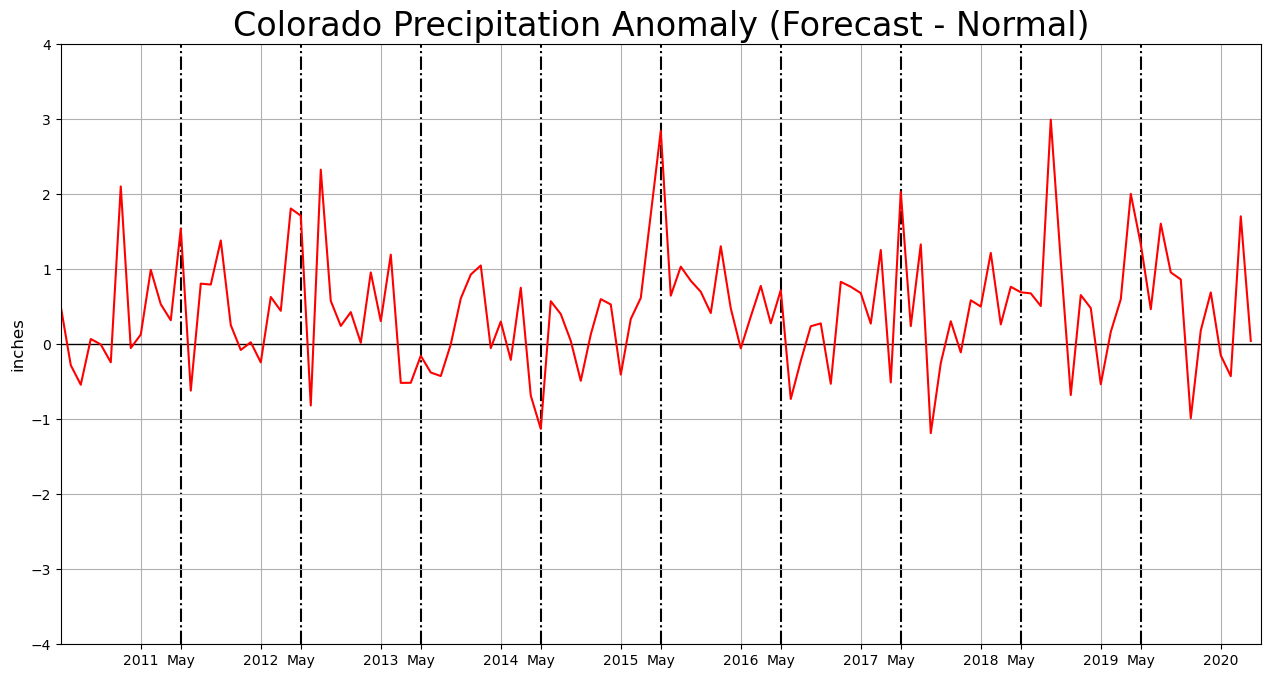

In [54]:
# Colorado Temperature Anomaly 

fig=plt.figure(figsize=(12,6))
ax=fig.add_axes([0,0,1,1])
line1=ax.plot((oldfcst-p_avgs[4:124]),'r')
ax.grid()
ax.set_title("Colorado Precipitation Anomaly (Forecast - Normal)", fontsize=24)
ax.set_xlim(0,120)
ax.set_ylim(-4,4)
ax.set_ylabel("inches", fontsize=12)
ax_formatter= FixedFormatter(['2011','May', '2012', 'May','2013', 'May','2014', 'May','2015','May', '2016', 'May','2017', 'May','2018','May', '2019', 'May','2020'])
ax_locator=FixedLocator([8,12, 20,24, 32, 36,44,48, 56,60, 68,72, 80,84, 92,96, 104,108, 116])
ax.xaxis.set_major_formatter(ax_formatter)
ax.xaxis.set_major_locator(ax_locator)

a=ax.get_ygridlines()
a2=a[4]
a2.set_color('black')
a2.set_linewidth(1)
a2.set_linestyle('solid')

arra=np.arange(1,19,2)
for i in arra:
    a = ax.get_xgridlines()
    b = a[i]
    b.set_color('black')
    b.set_linestyle('dashdot')
    b.set_linewidth(1.5)
plt.savefig("Colorado_Precip_Anomaly.jpg", format='jpg', dpi=100, bbox_inches='tight')

/tmp/ipykernel_36508/2871035681.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ax_formatter)


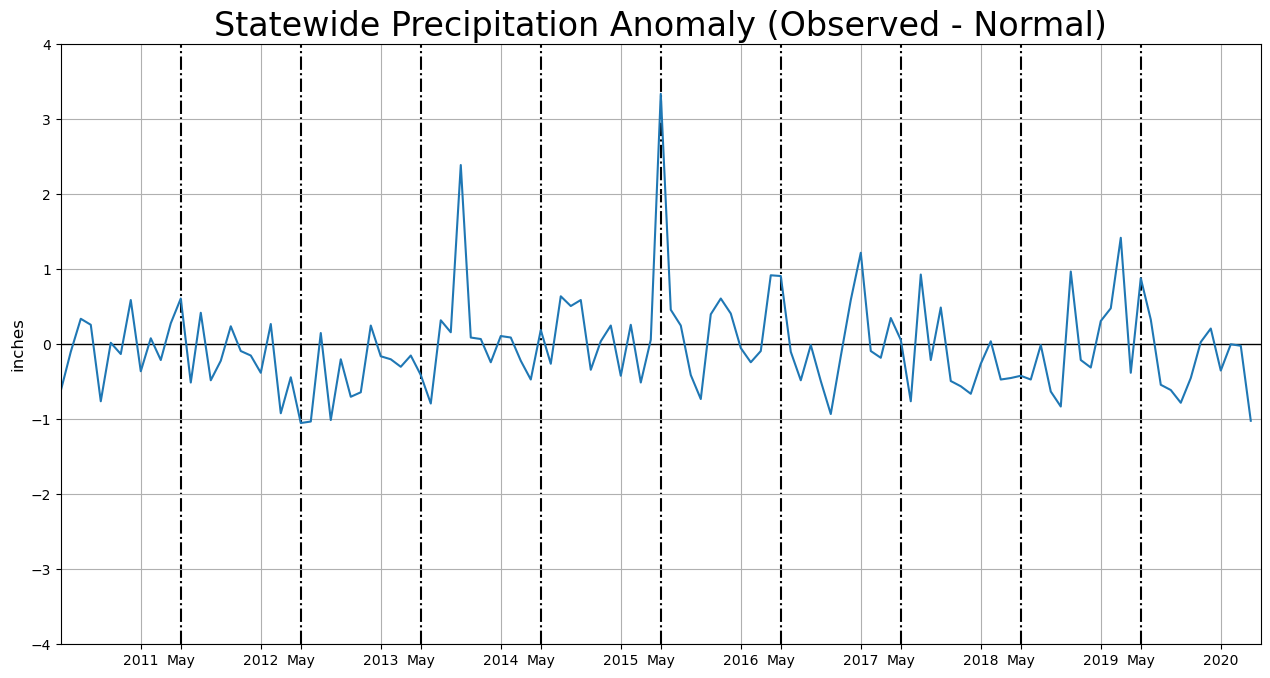

In [50]:
# Colorado Temperature Anomaly 

fig=plt.figure(figsize=(12,6))
ax=fig.add_axes([0,0,1,1])
line1=ax.plot((obsprecip[4:124]-p_avgs[4:124]))
ax.grid()
ax.set_title("Statewide Precipitation Anomaly (Observed - Normal)", fontsize=24)
ax.set_xlim(0,120)
ax.set_ylim(-4,4)
ax.set_ylabel("inches", fontsize=12)
ax_formatter= FixedFormatter(['2011','May', '2012', 'May','2013', 'May','2014', 'May','2015','May', '2016', 'May','2017', 'May','2018','May', '2019', 'May','2020'])
ax_locator=FixedLocator([8,12, 20,24, 32, 36,44,48, 56,60, 68,72, 80,84, 92,96, 104,108, 116])
ax.xaxis.set_major_formatter(ax_formatter)
ax.xaxis.set_major_locator(ax_locator)

a=ax.get_ygridlines()
a2=a[4]
a2.set_color('black')
a2.set_linewidth(1)
a2.set_linestyle('solid')

arra=np.arange(1,19,2)
for i in arra:
    a = ax.get_xgridlines()
    b = a[i]
    b.set_color('black')
    b.set_linestyle('dashdot')
    b.set_linewidth(1.5)
#plt.savefig("ElNino3.4_Daily_Mean_SST.jpg", format='jpg', dpi=100, bbox_inches='tight')

/tmp/ipykernel_180591/660652835.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ax_formatter)


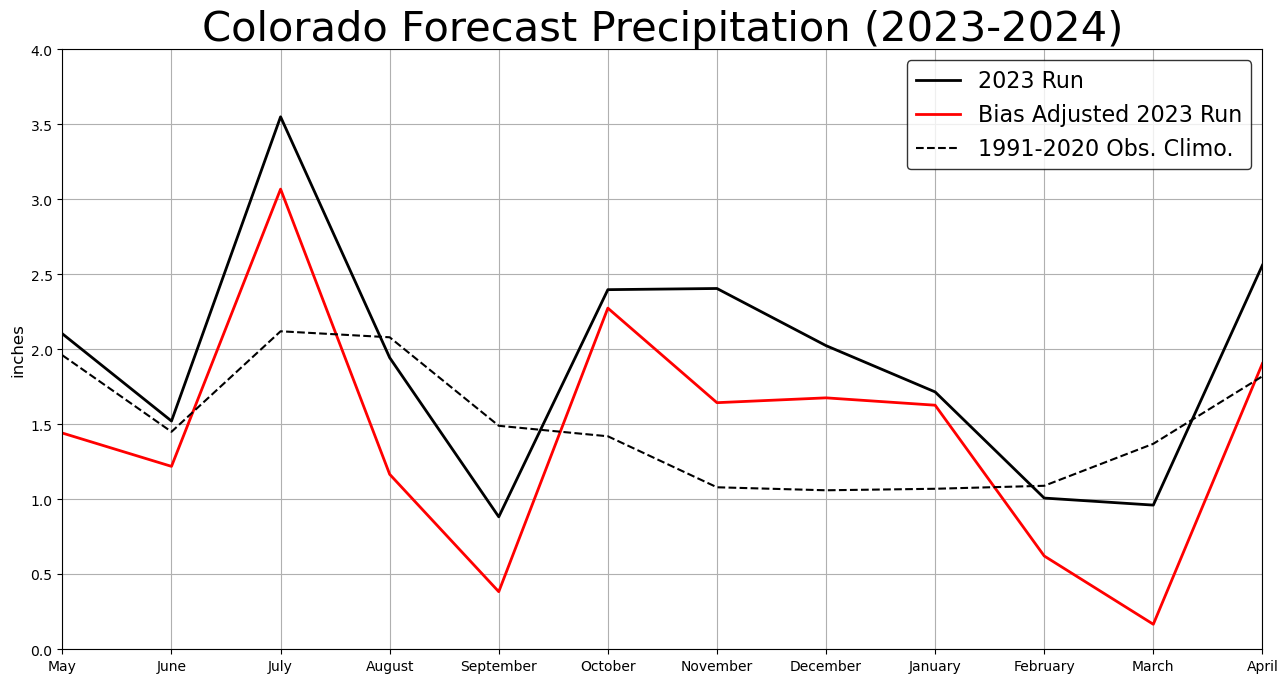

In [31]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_axes([0,0,1,1])
line1=ax.plot(newfcst, 'black',label="2023 Run", linewidth=2)
line2=ax.plot(newfcst-modelprecip_anomalies, 'red', label="Bias Adjusted 2023 Run", linewidth=2)
line20=ax.plot(p_avgs[4:16], 'black', linestyle='dashed', label='1991-2020 Obs. Climo.')
ax.grid()
ax.set_title("Colorado Forecast Precipitation (2023-2024)", fontsize=30)
ax.set_xlim(0,11)
ax.set_ylim(0,4)
ax.legend(loc='upper right', fontsize=16, edgecolor='black')
ax.set_ylabel("inches", fontsize=12)
ax_formatter= FixedFormatter(['May','June','July','August','September','October','November','December','January','February','March','April'])
ax_locator=FixedLocator([0,1,2,3,4,5,6,7,8,9,10,11])
ax.xaxis.set_major_formatter(ax_formatter)
ax.xaxis.set_major_locator(ax_locator)

plt.savefig("Colorado_Model_Precip.jpg", format='jpg', dpi=100, bbox_inches='tight')

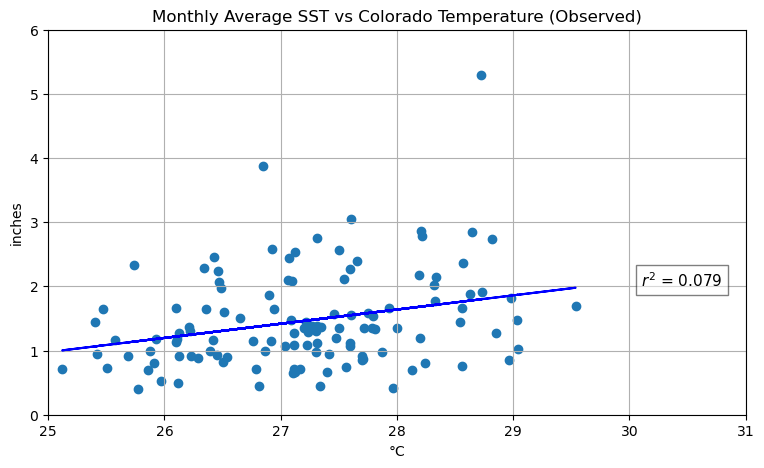

In [59]:
y=obsprecip[4:124]
x=obsst[344:464]
plt.figure(figsize=(9,5))
plt.scatter(x, y)

#Calculating R Squared and Rounding to 3 digits
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2

R_sq
rq=round(R_sq,3)
rq

plt.text(30.1, 2, '$r^2$ = ' +str(rq), fontsize = 11, 
        bbox = dict(facecolor = 'white', alpha = 0.5))

plt.ylabel('inches')
plt.grid()
plt.ylim(0,6)
plt.xlim(25,31)
plt.xlabel('°C')
plt.title('Monthly Average SST vs Colorado Precipitation (Observed)')
z = np.polyfit(x, y, 1)

p = np.poly1d(z)

plt.plot(x, p(x), 'b')
#plt.savefig('Obs_Scatter_TCC_vs_SST.png', format='png')

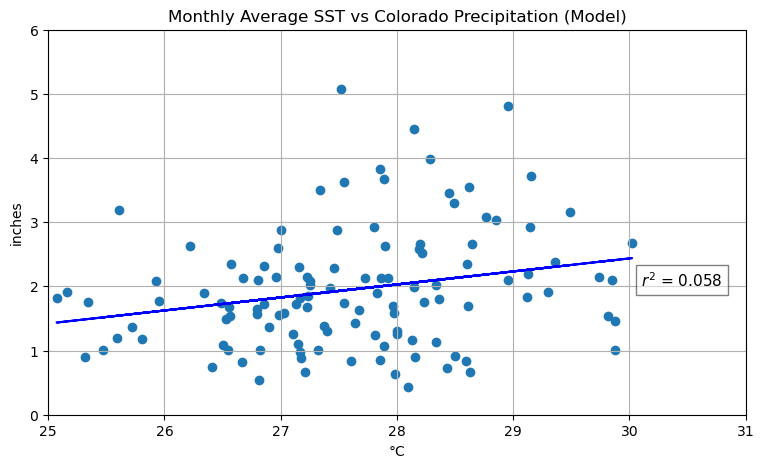

In [66]:
y=oldfcst[1:119]
x=modsst[0:118]
plt.figure(figsize=(9,5))
plt.scatter(x, y)

#Calculating R Squared and Rounding to 3 digits
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2

R_sq
rq=round(R_sq,3)
rq

plt.text(30.1, 2, '$r^2$ = ' +str(rq), fontsize = 11, 
        bbox = dict(facecolor = 'white', alpha = 0.5))

plt.ylabel('inches')
plt.grid()
plt.ylim(0,6)
plt.xlim(25,31)
plt.xlabel('°C')
plt.title('Monthly Average SST vs Colorado Precipitation (Model)')
z = np.polyfit(x, y, 1)

p = np.poly1d(z)

plt.plot(x, p(x), 'b')
#plt.savefig('Obs_Scatter_TCC_vs_SST.png', format='png')

In [29]:
# Model - Observed (Anomalies)
mayprecip_anom=((oldfcst[0]-obsprecip[4])+(oldfcst[12]-obsprecip[16])+(oldfcst[24]-obsprecip[28])+(oldfcst[36]-obsprecip[40])+
           (oldfcst[48]-obsprecip[52])+(oldfcst[60]-obsprecip[64])+(oldfcst[72]-obsprecip[76])+(oldfcst[84]-obsprecip[88])+
           (oldfcst[96]-obsprecip[100])+(oldfcst[108]-obsprecip[112]))/10
juneprecip_anom=((oldfcst[1]-obsprecip[5])+(oldfcst[13]-obsprecip[17])+(oldfcst[25]-obsprecip[29])+(oldfcst[37]-obsprecip[41])+
           (oldfcst[49]-obsprecip[53])+(oldfcst[61]-obsprecip[65])+(oldfcst[73]-obsprecip[77])+(oldfcst[85]-obsprecip[89])+
           (oldfcst[97]-obsprecip[101])+(oldfcst[109]-obsprecip[113]))/10
julyprecip_anom=((oldfcst[2]-obsprecip[6])+(oldfcst[14]-obsprecip[18])+(oldfcst[26]-obsprecip[30])+(oldfcst[38]-obsprecip[42])+
           (oldfcst[50]-obsprecip[54])+(oldfcst[62]-obsprecip[66])+(oldfcst[74]-obsprecip[78])+(oldfcst[86]-obsprecip[90])+
           (oldfcst[98]-obsprecip[102])+(oldfcst[110]-obsprecip[114]))/10
augprecip_anom=((oldfcst[3]-obsprecip[7])+(oldfcst[15]-obsprecip[19])+(oldfcst[27]-obsprecip[31])+(oldfcst[39]-obsprecip[43])+
           (oldfcst[51]-obsprecip[55])+(oldfcst[63]-obsprecip[67])+(oldfcst[75]-obsprecip[79])+(oldfcst[87]-obsprecip[91])+
           (oldfcst[99]-obsprecip[103])+(oldfcst[111]-obsprecip[115]))/10
sepprecip_anom=((oldfcst[4]-obsprecip[8])+(oldfcst[16]-obsprecip[20])+(oldfcst[28]-obsprecip[32])+(oldfcst[40]-obsprecip[44])+
           (oldfcst[52]-obsprecip[56])+(oldfcst[64]-obsprecip[68])+(oldfcst[76]-obsprecip[80])+(oldfcst[88]-obsprecip[92])+
           (oldfcst[100]-obsprecip[104])+(oldfcst[112]-obsprecip[116]))/10
octprecip_anom=((oldfcst[5]-obsprecip[9])+(oldfcst[17]-obsprecip[21])+(oldfcst[29]-obsprecip[33])+(oldfcst[41]-obsprecip[45])+
           (oldfcst[53]-obsprecip[57])+(oldfcst[65]-obsprecip[69])+(oldfcst[77]-obsprecip[81])+(oldfcst[89]-obsprecip[93])+
           (oldfcst[101]-obsprecip[105])+(oldfcst[113]-obsprecip[117]))/10
novprecip_anom=((oldfcst[6]-obsprecip[10])+(oldfcst[18]-obsprecip[22])+(oldfcst[30]-obsprecip[34])+(oldfcst[42]-obsprecip[46])+
           (oldfcst[54]-obsprecip[58])+(oldfcst[66]-obsprecip[70])+(oldfcst[78]-obsprecip[82])+(oldfcst[90]-obsprecip[94])+
           (oldfcst[102]-obsprecip[106])+(oldfcst[114]-obsprecip[118]))/10
decprecip_anom=((oldfcst[7]-obsprecip[11])+(oldfcst[19]-obsprecip[23])+(oldfcst[31]-obsprecip[35])+(oldfcst[43]-obsprecip[47])+
           (oldfcst[55]-obsprecip[59])+(oldfcst[67]-obsprecip[71])+(oldfcst[79]-obsprecip[83])+(oldfcst[91]-obsprecip[95])+
           (oldfcst[103]-obsprecip[107])+(oldfcst[115]-obsprecip[119]))/10
janprecip_anom=((oldfcst[8]-obsprecip[12])+(oldfcst[20]-obsprecip[24])+(oldfcst[32]-obsprecip[36])+(oldfcst[44]-obsprecip[48])+
           (oldfcst[56]-obsprecip[60])+(oldfcst[68]-obsprecip[72])+(oldfcst[80]-obsprecip[84])+(oldfcst[92]-obsprecip[96])+
           (oldfcst[104]-obsprecip[108])+(oldfcst[116]-obsprecip[120]))/10
febprecip_anom=((oldfcst[9]-obsprecip[13])+(oldfcst[21]-obsprecip[25])+(oldfcst[33]-obsprecip[37])+(oldfcst[45]-obsprecip[49])+
           (oldfcst[57]-obsprecip[61])+(oldfcst[69]-obsprecip[73])+(oldfcst[81]-obsprecip[85])+(oldfcst[93]-obsprecip[97])+
           (oldfcst[105]-obsprecip[109])+(oldfcst[117]-obsprecip[121]))/10
marprecip_anom=((oldfcst[10]-obsprecip[14])+(oldfcst[22]-obsprecip[26])+(oldfcst[34]-obsprecip[38])+(oldfcst[46]-obsprecip[50])+
           (oldfcst[58]-obsprecip[62])+(oldfcst[70]-obsprecip[74])+(oldfcst[82]-obsprecip[86])+(oldfcst[94]-obsprecip[98])+
           (oldfcst[106]-obsprecip[110])+(oldfcst[118]-obsprecip[122]))/10
aprprecip_anom=((oldfcst[11]-obsprecip[15])+(oldfcst[23]-obsprecip[27])+(oldfcst[35]-obsprecip[39])+(oldfcst[47]-obsprecip[51])+
           (oldfcst[59]-obsprecip[63])+(oldfcst[71]-obsprecip[75])+(oldfcst[83]-obsprecip[87])+(oldfcst[95]-obsprecip[99])+
           (oldfcst[107]-obsprecip[111])+(oldfcst[119]-obsprecip[123]))/10


In [30]:
modelprecip_anomalies=[mayprecip_anom,juneprecip_anom,julyprecip_anom,augprecip_anom,sepprecip_anom,octprecip_anom,
                       novprecip_anom,decprecip_anom,janprecip_anom,febprecip_anom,marprecip_anom,aprprecip_anom]


/tmp/ipykernel_30073/3691219445.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ax_formatter)


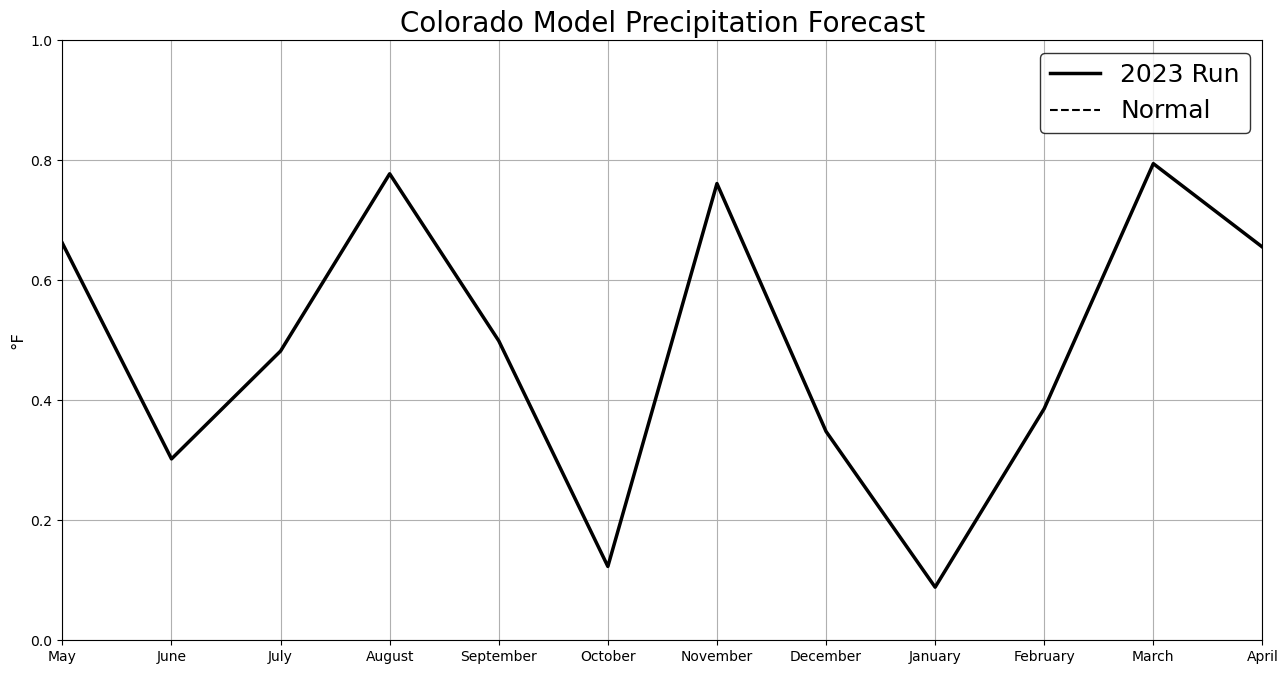

In [24]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_axes([0,0,1,1])
line1=ax.plot(modelprecip_anomalies, 'black',label="2023 Run", linewidth=2.5)
line20=ax.plot(p_avgs[4:16], 'black', linestyle='dashed', label='Normal')
ax.grid()
ax.set_title("Colorado Model Precipitation Forecast", fontsize=20)
ax.set_xlim(0,11)
ax.set_ylim(0,1)
ax.legend(loc='upper right', fontsize=18, edgecolor='black')
ax.set_ylabel("°F", fontsize=12)
ax_formatter= FixedFormatter(['May','June','July','August','September','October','November','December','January','February','March','April'])
ax_locator=FixedLocator([0,1,2,3,4,5,6,7,8,9,10,11])
ax.xaxis.set_major_formatter(ax_formatter)
ax.xaxis.set_major_locator(ax_locator)


#plt.savefig("Global_Monthly_Mean_SST.jpg", format='jpg', dpi=100, bbox_inches='tight')

In [63]:
ano=precipanom23-modelprecip_anomalies

In [59]:
x=np.zeros((10))
y=0
for i in range(0,120,12):
    x[y]=oldfcst[i]
    y=y+1
    